<a href="https://colab.research.google.com/github/siddheshDA/exploratory-data-analysis-titanic/blob/main/exploratory-data-analysis-titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install packages if missing (Colab usually has these)
!pip -q install pandas matplotlib seaborn numpy notebook

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Set visuals
%matplotlib inline
sns.set(style="whitegrid", context="notebook", font_scale=1)
plt.rcParams['figure.figsize'] = (8,5)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.1 MB/s eta 0:00:00


In [2]:
# If you prefer to upload via UI, comment this cell out and upload using the Colab "Files" pane.
from google.colab import files
uploaded = files.upload()  # Use the dialog to upload train.csv (and test.csv if you want)
# After upload, the files are available in the current working directory
print("Uploaded:", list(uploaded.keys()))


Saving train.csv to train.csv
Uploaded: ['train.csv']


In [3]:
# Attempt to load train.csv from the notebook directory.
DATAFILE = "train.csv"  # change if needed

if not os.path.exists(DATAFILE):
    raise FileNotFoundError(f"{DATAFILE} not found. Please upload train.csv via the Files pane or the upload cell.")

df = pd.read_csv(DATAFILE)
print("Loaded:", DATAFILE, "| shape:", df.shape)
display(df.head())


Loaded: train.csv | shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Basic structural overview
display(Markdown("## Dataset Info"))
print(df.info())

display(Markdown("## Descriptive statistics (numeric)"))
display(df.describe().T)

display(Markdown("## Descriptive statistics (all)"))
display(df.describe(include='all').T)


## Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Descriptive statistics (numeric)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Descriptive statistics (all)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [5]:
display(Markdown("## Missing values (per column)"))
missing = df.isnull().sum().sort_values(ascending=False)
display(missing)

display(Markdown("## Percentage missing"))
display((df.isnull().mean().sort_values(ascending=False) * 100).round(2))

display(Markdown("## Duplicate rows"))
dups = df.duplicated().sum()
print("Duplicate rows count:", dups)


## Missing values (per column)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


## Percentage missing

,0
Cabin,77.10
Age,19.87
Embarked,0.22
PassengerId,0.00
Name,0.00
Pclass,0.00
Survived,0.00
Sex,0.00
Parch,0.00
SibSp,0.00


## Duplicate rows

Duplicate rows count: 0


In [6]:
# show counts for the most informative categorical columns
cols_to_check = ['Survived','Pclass','Sex','Embarked','SibSp','Parch']
for c in cols_to_check:
    if c in df.columns:
        display(Markdown(f"### Value counts: `{c}`"))
        display(df[c].value_counts(dropna=False))


### Value counts: `Survived`

,count
Survived,
0,549
1,342


### Value counts: `Pclass`

,count
Pclass,
3,491
1,216
2,184


### Value counts: `Sex`

,count
Sex,
male,577
female,314


### Value counts: `Embarked`

,count
Embarked,
S,644
C,168
Q,77
NaN,2


### Value counts: `SibSp`

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


### Value counts: `Parch`

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [7]:
# Create a working copy
eda = df.copy()

# Feature: FamilySize
if set(['SibSp','Parch']).issubset(eda.columns):
    eda['FamilySize'] = eda['SibSp'] + eda['Parch'] + 1  # +1 for self

# Feature: IsAlone
if 'FamilySize' in eda.columns:
    eda['IsAlone'] = (eda['FamilySize'] == 1).astype(int)

# Feature: Title extracted from Name (if exists)
if 'Name' in eda.columns:
    eda['Title'] = eda['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
    # group rare titles
    common_titles = eda['Title'].value_counts().loc[lambda x: x>10].index
    eda['Title'] = eda['Title'].where(eda['Title'].isin(common_titles), 'Other')

# Flag missing Age
if 'Age' in eda.columns:
    eda['Age_missing'] = eda['Age'].isnull().astype(int)

# Basic imputation example (not for modeling final)
if 'Age' in eda.columns:
    eda['Age_imputed'] = eda['Age'].fillna(eda['Age'].median())

display(Markdown("## New features created (if available): FamilySize, IsAlone, Title, Age_missing, Age_imputed"))
display(eda.head()[['FamilySize','IsAlone','Title','Age','Age_missing','Age_imputed']].head())


## New features created (if available): FamilySize, IsAlone, Title, Age_missing, Age_imputed

,FamilySize,IsAlone,Title,Age,Age_missing,Age_imputed
0,2,0,Mr,22.0,0,22.0
1,2,0,Mrs,38.0,0,38.0
2,1,1,Miss,26.0,0,26.0
3,2,0,Mrs,35.0,0,35.0
4,1,1,Mr,35.0,0,35.0


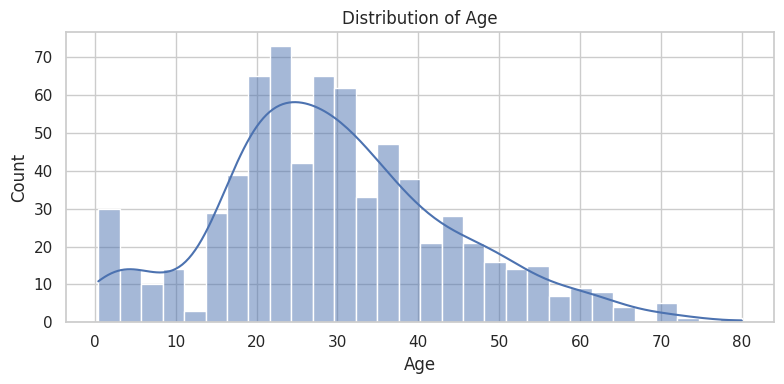

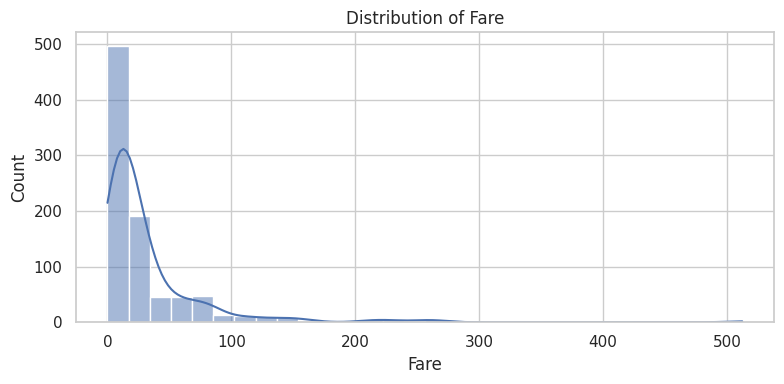

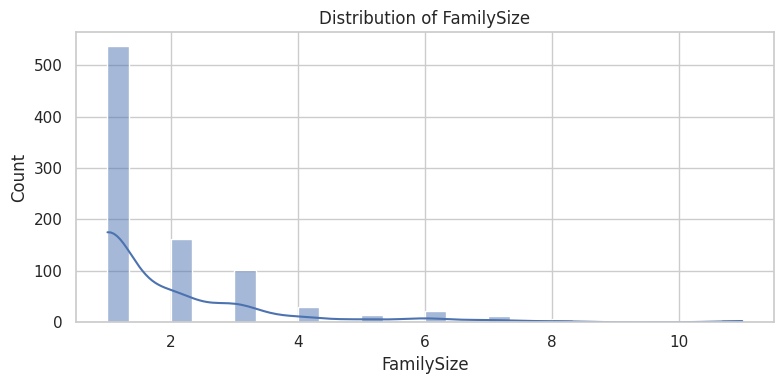

In [8]:
num_cols = eda.select_dtypes(include=[np.number]).columns.tolist()
# Plot histograms for a selection
plot_cols = [c for c in ['Age','Fare','FamilySize'] if c in eda.columns]
for c in plot_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(eda[c].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


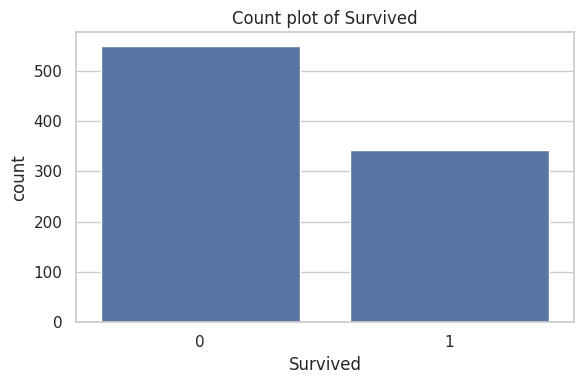

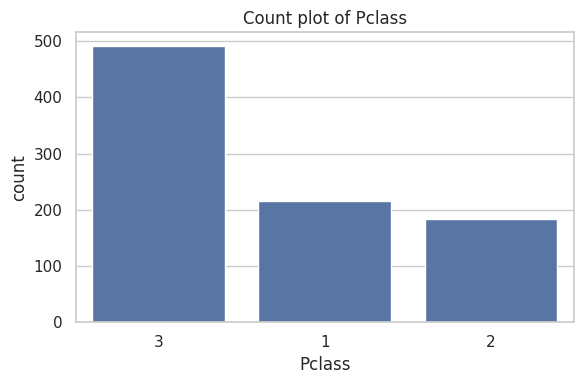

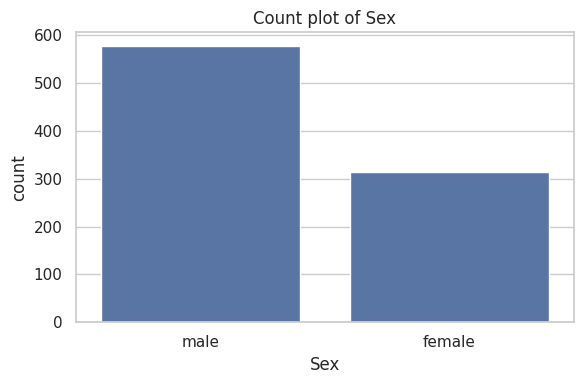

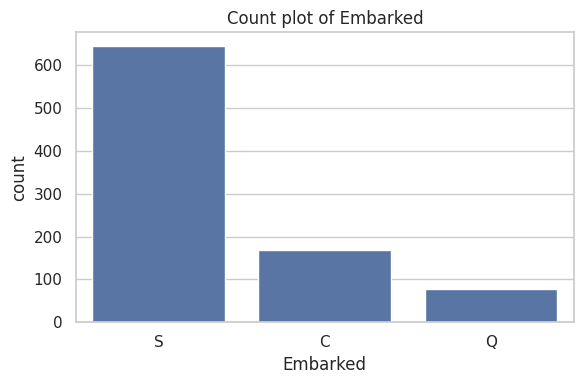

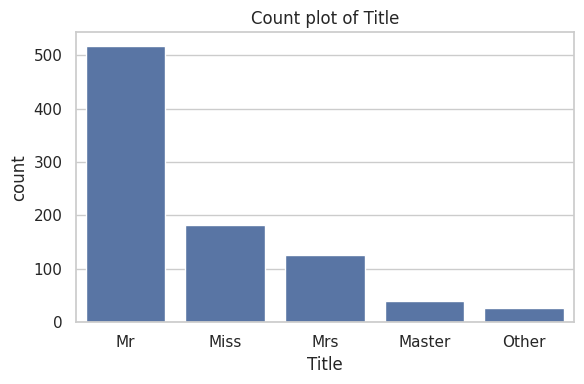

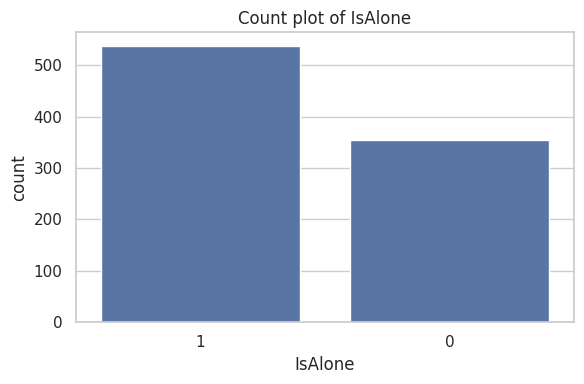

In [9]:
cat_cols = [c for c in ['Survived','Pclass','Sex','Embarked','Title','IsAlone'] if c in eda.columns]
for c in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=eda, x=c, order=eda[c].value_counts().index)
    plt.title(f"Count plot of {c}")
    plt.tight_layout()
    plt.show()


**Overall survival rate:** 0.3838

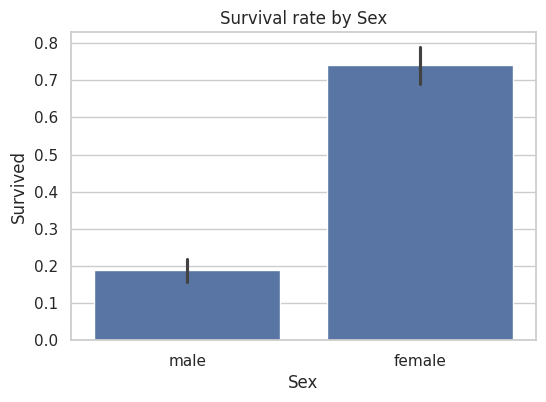

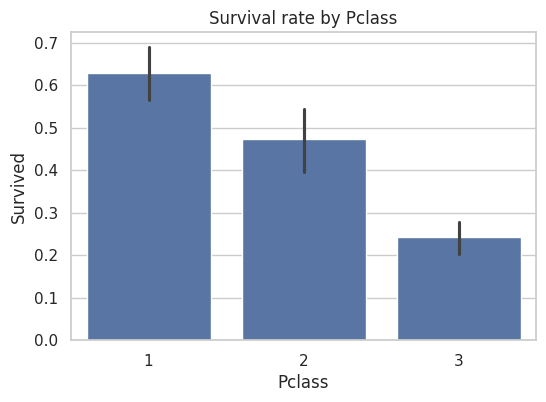

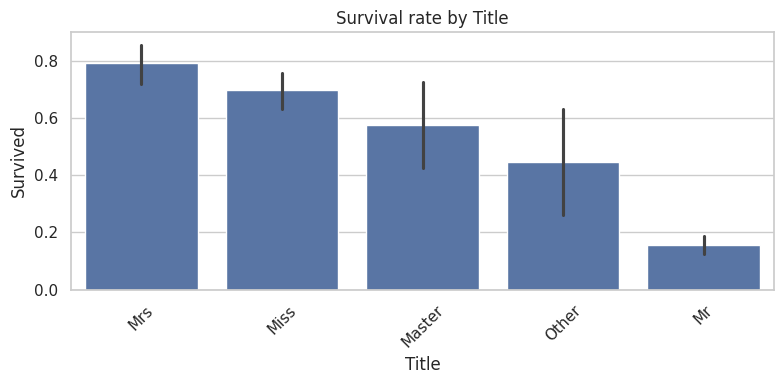

In [10]:
# Survival rate overall
if 'Survived' in eda.columns:
    overall = eda['Survived'].mean()
    display(Markdown(f"**Overall survival rate:** {overall:.4f}"))

# Survival by Sex and Pclass (barplots)
if set(['Survived','Sex']).issubset(eda.columns):
    plt.figure(figsize=(6,4))
    sns.barplot(data=eda, x='Sex', y='Survived')
    plt.title("Survival rate by Sex")
    plt.show()

if set(['Survived','Pclass']).issubset(eda.columns):
    plt.figure(figsize=(6,4))
    sns.barplot(data=eda, x='Pclass', y='Survived', order=sorted(eda['Pclass'].unique()))
    plt.title("Survival rate by Pclass")
    plt.show()

# Survival by Title if available
if set(['Survived','Title']).issubset(eda.columns):
    plt.figure(figsize=(8,4))
    sns.barplot(data=eda, x='Title', y='Survived', order=eda.groupby('Title')['Survived'].mean().sort_values(ascending=False).index)
    plt.title("Survival rate by Title")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


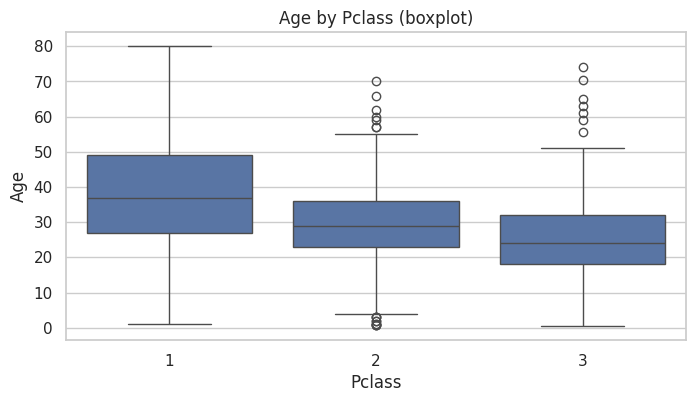

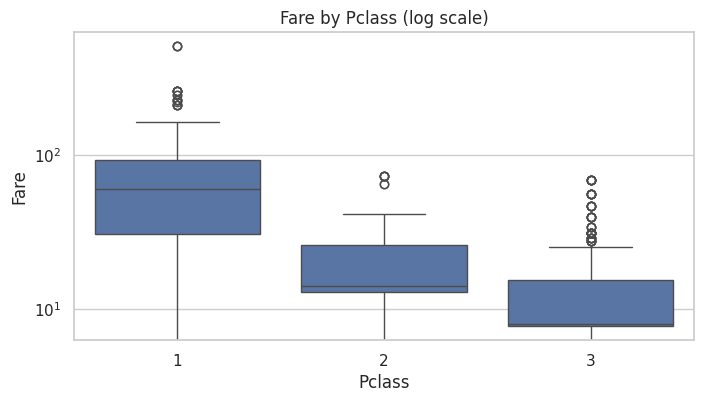

In [11]:
# Age distribution by Pclass
if set(['Age','Pclass']).issubset(eda.columns):
    plt.figure(figsize=(8,4))
    sns.boxplot(data=eda, x='Pclass', y='Age')
    plt.title("Age by Pclass (boxplot)")
    plt.show()

# Fare distribution by Pclass
if set(['Fare','Pclass']).issubset(eda.columns):
    plt.figure(figsize=(8,4))
    sns.boxplot(data=eda, x='Pclass', y='Fare')
    plt.yscale('log')  # log view helps with skew
    plt.title("Fare by Pclass (log scale)")
    plt.show()


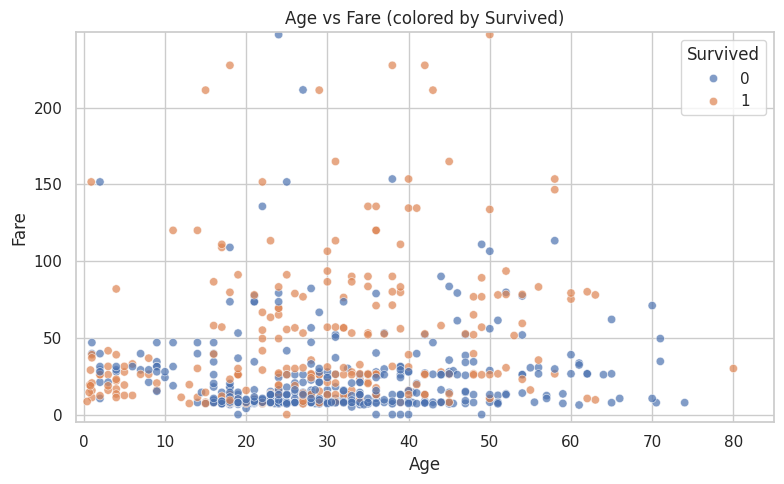

In [12]:
if set(['Age','Fare','Survived']).issubset(eda.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=eda, x='Age', y='Fare', hue='Survived', alpha=0.7)
    plt.title("Age vs Fare (colored by Survived)")
    plt.xlim(-1, 85)
    plt.ylim(-5, eda['Fare'].quantile(0.99))
    plt.tight_layout()
    plt.show()


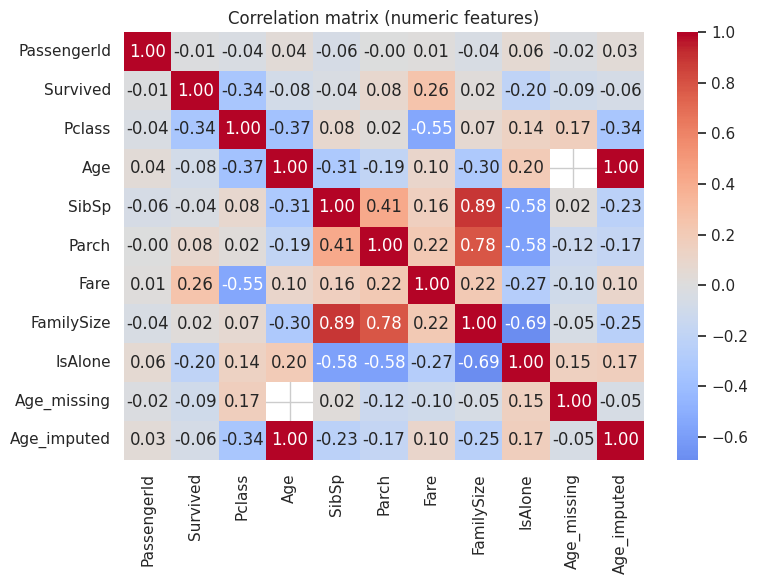

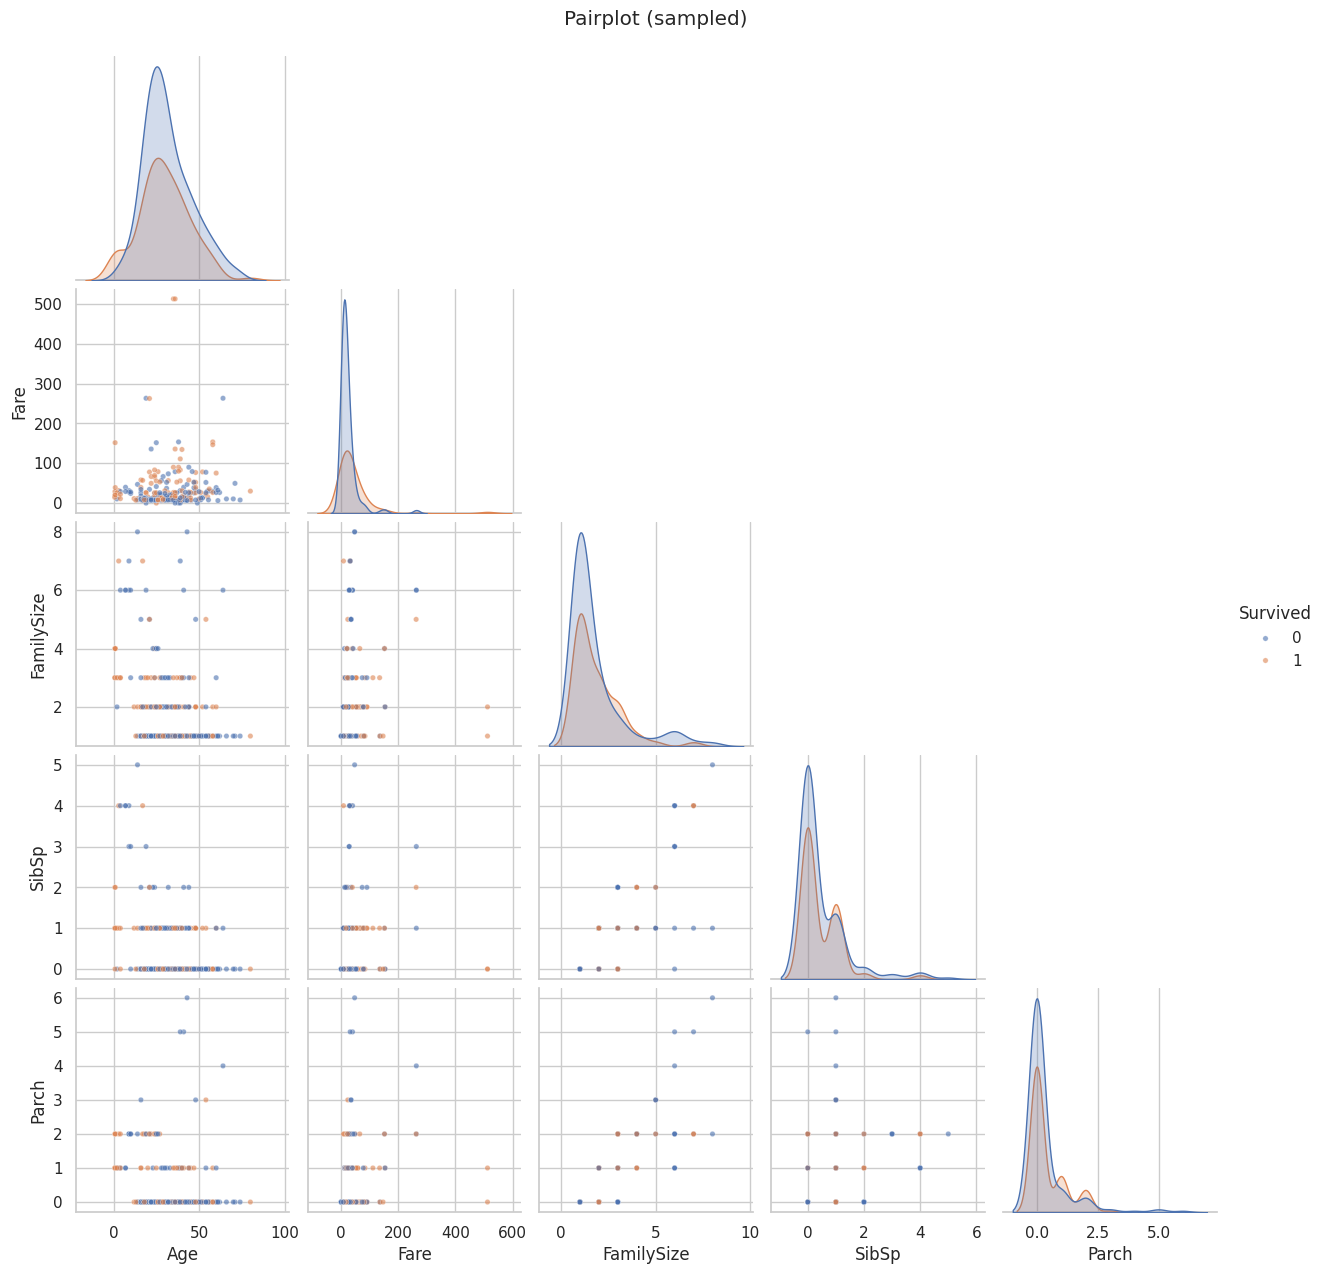

In [13]:
num_df = eda.select_dtypes(include=[np.number]).copy()
if not num_df.empty:
    corr = num_df.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation matrix (numeric features)")
    plt.tight_layout()
    plt.show()

# Pairplot - sample for performance (limit rows)
pair_cols = [c for c in ['Age','Fare','FamilySize','SibSp','Parch','Survived'] if c in eda.columns]
if len(pair_cols) >= 2:
    sns.pairplot(eda[pair_cols].dropna().sample(min(300, len(eda))), hue='Survived' if 'Survived' in pair_cols else None, corner=True, plot_kws={'s':15, 'alpha':0.6})
    plt.suptitle("Pairplot (sampled)", y=1.02)
    plt.show()


In [14]:
# Survival rates by groups
observations = []

if set(['Survived','Sex']).issubset(eda.columns):
    surv_sex = eda.groupby('Sex')['Survived'].mean().to_dict()
    observations.append(f"Survival by Sex: {surv_sex}")

if set(['Survived','Pclass']).issubset(eda.columns):
    surv_pclass = eda.groupby('Pclass')['Survived'].mean().to_dict()
    observations.append(f"Survival by Pclass: {surv_pclass}")

if 'Title' in eda.columns and 'Survived' in eda.columns:
    surv_title = eda.groupby('Title')['Survived'].mean().sort_values(ascending=False).to_dict()
    observations.append(f"Survival by Title (top): {dict(list(surv_title.items())[:8])}")

# Show computed observations
display(Markdown("## Computed observations"))
for o in observations:
    display(Markdown("- " + o))


## Computed observations

- Survival by Sex: {'female': 0.7420382165605095, 'male': 0.18890814558058924}

- Survival by Pclass: {1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}

- Survival by Title (top): {'Mrs': 0.792, 'Miss': 0.6978021978021978, 'Master': 0.575, 'Other': 0.4444444444444444, 'Mr': 0.15667311411992263}

In [15]:
## Observations (summary)
- Overall survival rate is about **38%** (exact number depends on dataset).
- **Female** passengers have a much higher survival rate than **male** passengers.
- Passengers in **Pclass 1** had the highest survival rates; Pclass 3 the lowest.
- `Cabin` has many missing values — not safe to use directly without heavy feature engineering.
- `Age` has missing values — consider careful imputation (median by Title/Pclass or model-based imputation).
- Fare is right-skewed (use log-transform if modelling).

## Recommendations
1. For modeling: impute Age (grouped median by Title or Pclass+Sex), create `FamilySize`, `IsAlone`, and encode `Title` and `Embarked`.
2. Drop or engineer `Cabin` carefully (extract deck letter where available).
3. Consider log-transform of `Fare` to reduce skew for algorithms sensitive to distributions.
4. Use cross-validation and check class imbalance when building predictive models.


SyntaxError: invalid character '—' (U+2014) (ipython-input-2595456435.py, line 5)

In [16]:
# Optional: save a couple of important plots to disk for submission
os.makedirs("plots", exist_ok=True)

# Example: save correlation heatmap
if not num_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation matrix")
    plt.savefig("plots/correlation_heatmap.png", bbox_inches='tight', dpi=150)
    plt.close()

# Save a sample countplot
if 'Survived' in eda.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=eda, x='Survived')
    plt.title("Survival counts")
    plt.savefig("plots/count_survived.png", bbox_inches='tight', dpi=150)
    plt.close()

print("Saved sample plots to ./plots. Download zip of notebook + plots before submitting.")


Saved sample plots to ./plots. Download zip of notebook + plots before submitting.
